# Assignment 3

#import liberaries 

In [ ]:
!pip install pycaret[full]
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.15.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you ha

In [ ]:
!pip uninstall jinja2 --yes
!pip install jinja2

Found existing installation: Jinja2 2.11.3
Uninstalling Jinja2-2.11.3:
  Successfully uninstalled Jinja2-2.11.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.15.0 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.34.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
google-colab 1.0.0 requires tornado~=5.1.0; python_version >= "3.0", but you have tornado 6.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but yo

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# import all required libraries
import numpy as np
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px

import numpy as np
import pandas as pd
from pycaret.anomaly import *
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score


from sklearn.cluster import  DBSCAN
sns.reset_defaults()

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



# load data

In [ ]:
df1=pd.read_csv('Dataset_to_be_used_in_anomaly_detection.csv')
df1

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader
0,9,-1.042570,-0.241098,-1.267957,0.414568
1,10,-1.056986,-0.245590,-1.165454,0.411869
2,11,-1.071858,-0.256787,-1.028780,0.407472
3,12,-1.084518,-0.257502,-0.850609,0.367564
4,13,-0.974811,-0.105985,-0.625045,0.236174
5,14,-0.808289,-0.008651,-0.417019,0.035897
6,15,-0.732102,-0.051811,-0.258204,-0.238741
7,16,-0.499133,-0.205854,-0.178043,-0.506508
8,17,-0.372178,-0.405159,-0.193983,-0.766137
9,18,-0.345284,-0.627297,-0.318578,-1.035780


In [ ]:
df2=pd.read_csv('/content/Dataset_to_be_used_in_performance_comparison.csv')
df2

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,labels
0,9,-1.042570,-0.241098,-1.267957,0.414568,0.0
1,10,-1.056986,-0.245590,-1.165454,0.411869,0.0
2,11,-1.071858,-0.256787,-1.028780,0.407472,0.0
3,12,-1.084518,-0.257502,-0.850609,0.367564,0.0
4,13,-0.974811,-0.105985,-0.625045,0.236174,0.0
5,14,-0.808289,-0.008651,-0.417019,0.035897,0.0
6,15,-0.732102,-0.051811,-0.258204,-0.238741,0.0
7,16,-0.499133,-0.205854,-0.178043,-0.506508,0.0
8,17,-0.372178,-0.405159,-0.193983,-0.766137,0.0
9,18,-0.345284,-0.627297,-0.318578,-1.035780,0.0


In [ ]:
df2['labels'].value_counts()

0.0    86
1.0    12
Name: labels, dtype: int64

### evaluation Function 

In [ ]:
def eval(y_test,y_pred):
  
  acc=accuracy_score(y_test,y_pred)
  print("_________________________________________________________________________")
  print("The Test accuracy :",acc)
  print("_________________________________________________________________________")
  print(classification_report(y_test,y_pred))
  print("_________________________________________________________________________")
  
  pr,re,fc,c=precision_recall_fscore_support(y_test, y_pred, average='macro')
  pr1,re1,fc1,c=precision_recall_fscore_support(y_test, y_pred, average='weighted')
  print("The macro precision on test data is  :",pr)
  print("The weighted precision on test data is  :",pr1)
  print("_________________________________________________________________________")
  print("The macro recall on test data is  :",re)
  print("The weighted recall on test data is  :",re1)
  print("_________________________________________________________________________")
  print("The macro f_score on test data is  :",fc)
  print("The weighted f_score on test data is  :",fc1)
  print("_________________________________________________________________________")
  cm = confusion_matrix(y_test,y_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot()


  plt.show()
  




### tsne Plot Function 

In [ ]:
def tsne(X,y,k,title):
  tsne = TSNE(n_components=2, verbose=1, random_state=0)
  z = tsne.fit_transform(X)
  df = pd.DataFrame()
  df["y"] = y
  df["comp-1"] = z[:,0]
  df["comp-2"] = z[:,1]

  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", k),
                data=df).set(title=title)
  plt.show()

In [ ]:
X=df2.iloc[:,1:-1]
y=df2.iloc[:,-1]


In [ ]:
fig1 = px.line(df2, x="Unnamed: 0", y=['Follower_measure_x_follower',	'Follower_measure_y_follower',	'Leader_measure_x_leader',	'Leader_measure_y_leader'], title='Data')
fig1.show()

In [ ]:
s = setup(df1,ignore_features=['Unnamed: 0'], session_id = 123)

,Description,Value
0,session_id,123
1,Original Data,"(98, 5)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(98, 4)"
9,CPU Jobs,-1


 # unsupervised machine learning models

In [ ]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


## SVM model

In [ ]:
ML_Model_svm = create_model('svm')
anomalies_svm = assign_model(ML_Model_svm)
anomalies_svm.head()

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,9,-1.042570,-0.241098,-1.267957,0.414568,0,-0.846592
1,10,-1.056986,-0.245590,-1.165454,0.411869,0,-0.859350
2,11,-1.071858,-0.256787,-1.028780,0.407472,0,-0.760461
3,12,-1.084518,-0.257502,-0.850609,0.367564,0,-0.665501
4,13,-0.974811,-0.105985,-0.625045,0.236174,0,-0.400389


In [ ]:
plot_model(ML_Model_svm,'tsne')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 98 samples in 0.000s...
[t-SNE] Computed neighbors for 98 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 98 / 98
[t-SNE] Mean sigma: 0.817191
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.300911
[t-SNE] KL divergence after 950 iterations: 0.128069


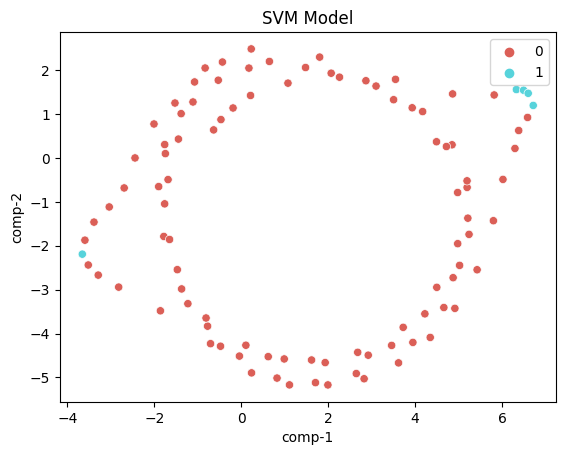

In [ ]:
tsne(X,anomalies_svm['Anomaly'],2,'SVM Model')

_________________________________________________________________________
The Test accuracy : 0.9285714285714286
_________________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        86
         1.0       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98

_________________________________________________________________________
The macro precision on test data is  : 0.9623655913978495
The weighted precision on test data is  : 0.93394777265745
_________________________________________________________________________
The macro recall on test data is  : 0.7083333333333334
The weighted recall on test data is  : 0.9285714285714286
_________________________________________________________________________
The macro f_score on test data is 

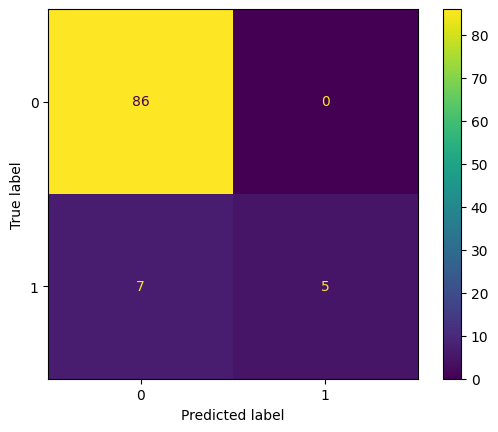

In [ ]:
eval(df2['labels'],anomalies_svm['Anomaly'])

In [ ]:
results = anomalies_svm.iloc[:,:-2]
anomalies = anomalies_svm[anomalies_svm['Anomaly'] == 1].iloc[:,:-2]

In [ ]:
fig1 = px.line(df2, x="Unnamed: 0", y=['Follower_measure_x_follower',	'Follower_measure_y_follower',	'Leader_measure_x_leader',	'Leader_measure_y_leader'], title='Data', template = 'plotly_dark')

fig2 = px.scatter(anomalies, x="Unnamed: 0", y=['Follower_measure_x_follower',	'Follower_measure_y_follower',	'Leader_measure_x_leader',	'Leader_measure_y_leader'],template = 'plotly_dark')

fig2.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

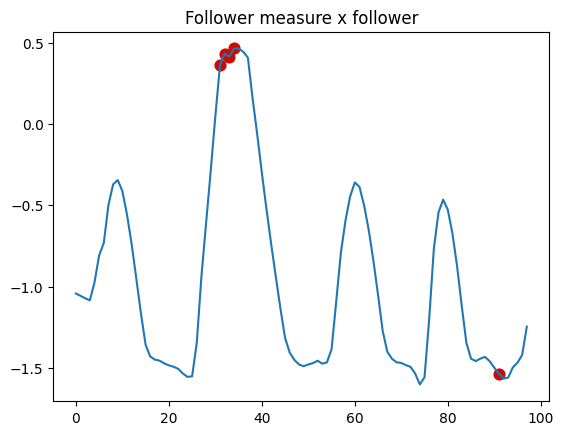

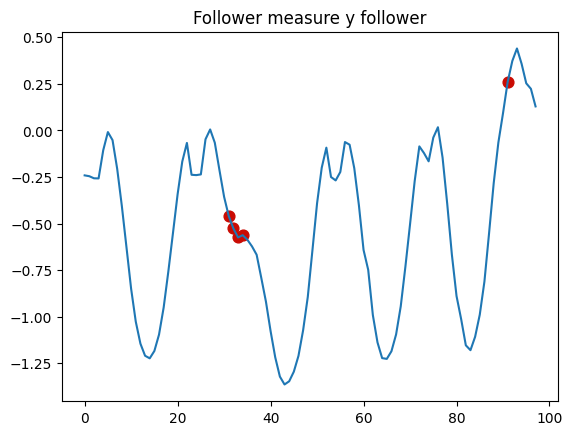

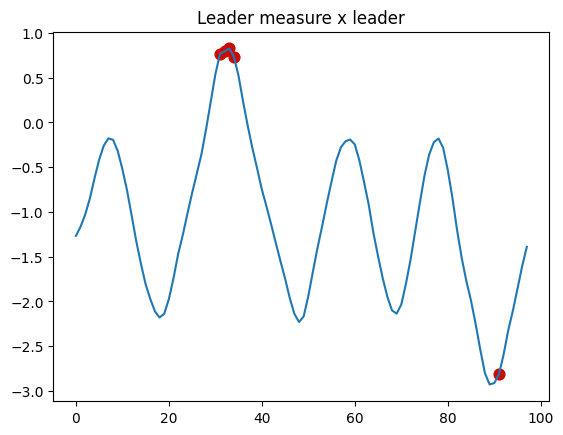

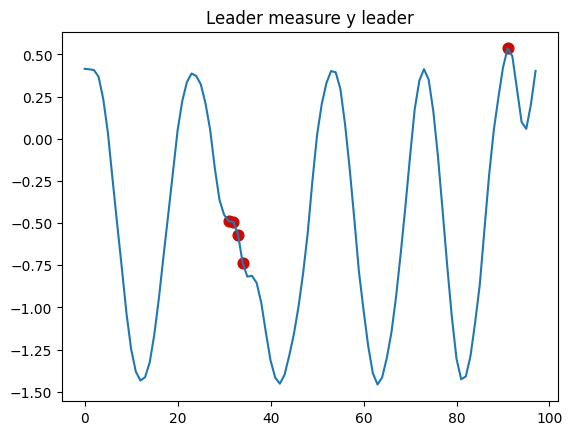

In [ ]:
results = anomalies_svm.iloc[:,:-2]
anomalies = anomalies_svm[anomalies_svm['Anomaly'] == 1].iloc[:,:-2]
anomalies.head()
for column in results.columns[1:]:
    plt.plot(anomalies_svm[column])
    plt.scatter(anomalies.index,anomalies[column],c='r',marker='o',s=60,alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()

## KNN model

In [ ]:
ML_Model_knn = create_model('knn')
anomalies_knn = assign_model(ML_Model_knn)
anomalies_knn.head()

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,9,-1.042570,-0.241098,-1.267957,0.414568,0,0.446403
1,10,-1.056986,-0.245590,-1.165454,0.411869,0,0.476462
2,11,-1.071858,-0.256787,-1.028780,0.407472,0,0.420715
3,12,-1.084518,-0.257502,-0.850609,0.367564,0,0.385327
4,13,-0.974811,-0.105985,-0.625045,0.236174,0,0.380718


In [ ]:
plot_model(ML_Model_knn,'tsne')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 98 samples in 0.000s...
[t-SNE] Computed neighbors for 98 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 98 / 98
[t-SNE] Mean sigma: 0.817191
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.300911
[t-SNE] KL divergence after 950 iterations: 0.128069


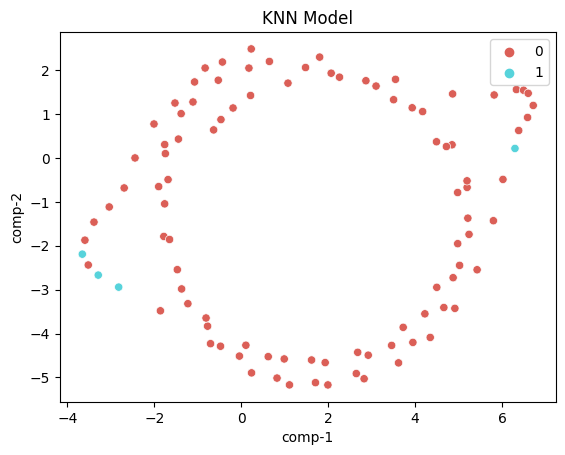

In [ ]:
tsne(X,anomalies_knn['Anomaly'],2,'KNN Model')

_________________________________________________________________________
The Test accuracy : 0.8979591836734694
_________________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94        86
         1.0       0.75      0.25      0.38        12

    accuracy                           0.90        98
   macro avg       0.83      0.62      0.66        98
weighted avg       0.89      0.90      0.87        98

_________________________________________________________________________
The macro precision on test data is  : 0.8271276595744681
The weighted precision on test data is  : 0.8853669127225359
_________________________________________________________________________
The macro recall on test data is  : 0.6191860465116279
The weighted recall on test data is  : 0.8979591836734694
_________________________________________________________________________
The macro f_score on test data i

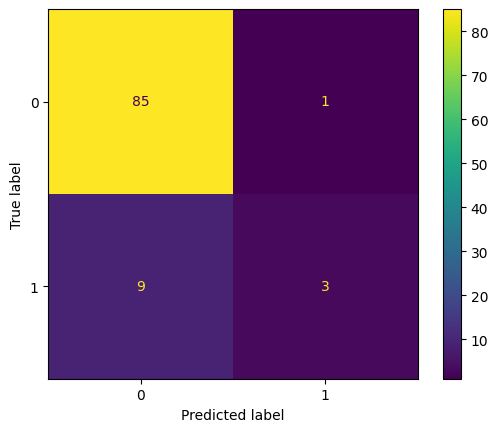

In [ ]:
eval(df2['labels'],anomalies_knn['Anomaly'])

In [ ]:

results = anomalies_knn.iloc[:,:-2]
anomalies = anomalies_knn[anomalies_knn['Anomaly'] == 1].iloc[:,:-2]

In [ ]:
fig1 = px.line(df2, x="Unnamed: 0", y=['Follower_measure_x_follower',	'Follower_measure_y_follower',	'Leader_measure_x_leader',	'Leader_measure_y_leader'], title='Data', template = 'plotly_dark')

fig2 = px.scatter(anomalies, x="Unnamed: 0", y=['Follower_measure_x_follower',	'Follower_measure_y_follower',	'Leader_measure_x_leader',	'Leader_measure_y_leader'],template = 'plotly_dark')

fig2.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

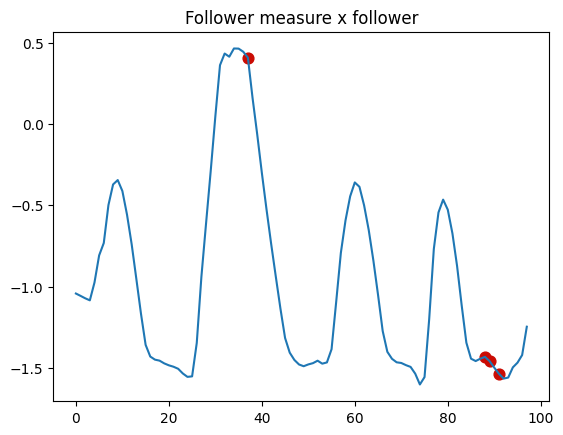

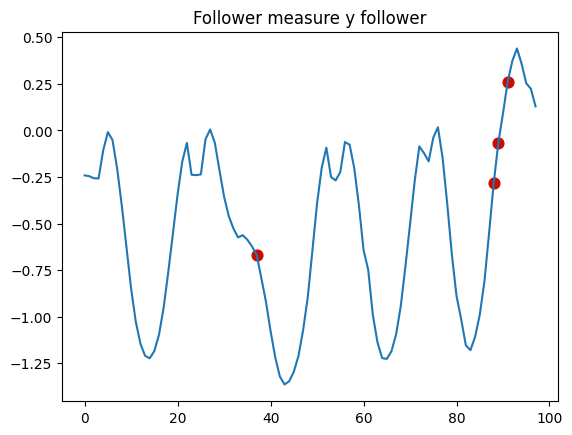

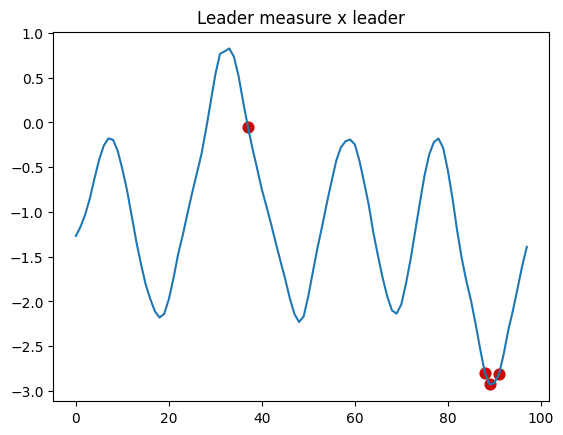

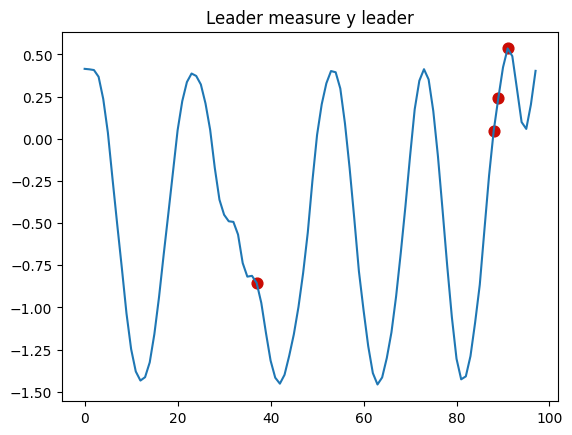

In [ ]:
for column in results.columns[1:]:
    plt.plot(anomalies_knn[column])
    plt.scatter(anomalies.index,anomalies[column],c='r',marker='o',s=60,alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()

## PCA Model 

In [ ]:
ML_Model_pca = create_model('pca')
anomalies_pca = assign_model(ML_Model_pca)
anomalies_pca.head()

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly,Anomaly_Score
0,9,-1.042570,-0.241098,-1.267957,0.414568,0,171.243668
1,10,-1.056986,-0.245590,-1.165454,0.411869,0,171.205205
2,11,-1.071858,-0.256787,-1.028780,0.407472,0,171.879672
3,12,-1.084518,-0.257502,-0.850609,0.367564,0,170.120084
4,13,-0.974811,-0.105985,-0.625045,0.236174,0,163.779848


In [ ]:
plot_model(ML_Model_pca,'tsne')

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 98 samples in 0.000s...
[t-SNE] Computed neighbors for 98 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 98 / 98
[t-SNE] Mean sigma: 0.817191
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.300911
[t-SNE] KL divergence after 950 iterations: 0.128069


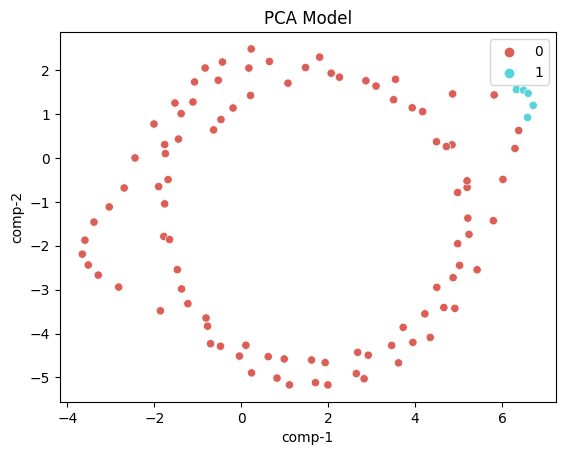

In [ ]:
tsne(X,anomalies_pca['Anomaly'],2,'PCA Model')

_________________________________________________________________________
The Test accuracy : 0.9285714285714286
_________________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        86
         1.0       1.00      0.42      0.59        12

    accuracy                           0.93        98
   macro avg       0.96      0.71      0.77        98
weighted avg       0.93      0.93      0.92        98

_________________________________________________________________________
The macro precision on test data is  : 0.9623655913978495
The weighted precision on test data is  : 0.93394777265745
_________________________________________________________________________
The macro recall on test data is  : 0.7083333333333334
The weighted recall on test data is  : 0.9285714285714286
_________________________________________________________________________
The macro f_score on test data is 

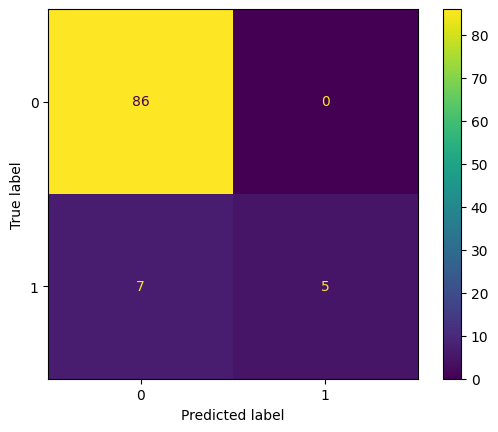

In [ ]:
eval(df2['labels'],anomalies_pca['Anomaly'])

In [ ]:

results = anomalies_pca.iloc[:,:-2]
anomalies = anomalies_pca[anomalies_pca['Anomaly'] == 1].iloc[:,:-2]

In [ ]:
fig1 = px.line(df2, x="Unnamed: 0", y=['Follower_measure_x_follower',	'Follower_measure_y_follower',	'Leader_measure_x_leader',	'Leader_measure_y_leader'], title='Data', template = 'plotly_dark')

fig2 = px.scatter(anomalies, x="Unnamed: 0", y=['Follower_measure_x_follower',	'Follower_measure_y_follower',	'Leader_measure_x_leader',	'Leader_measure_y_leader'],template = 'plotly_dark')

fig2.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

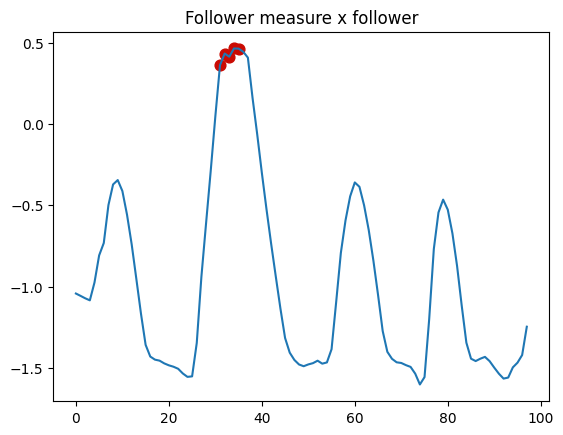

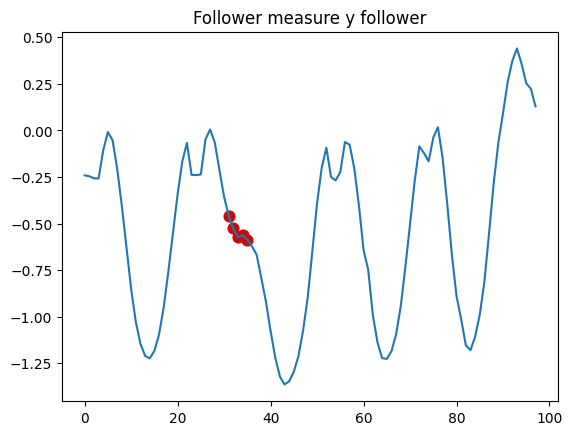

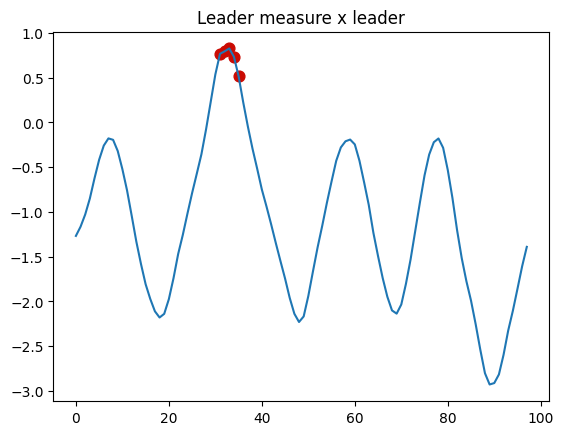

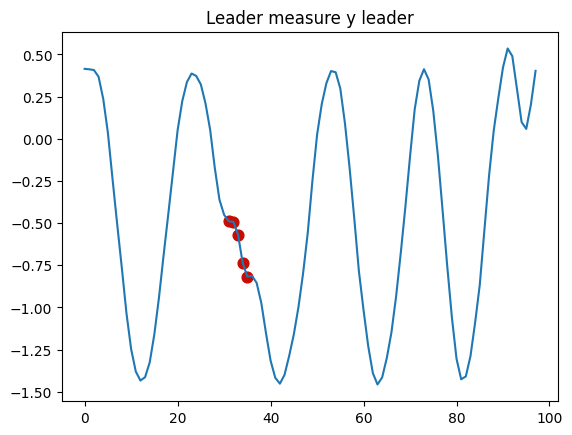

In [ ]:

for column in results.columns[1:]:
    plt.plot(anomalies_pca[column])
    plt.scatter(anomalies.index,anomalies[column],c='r',marker='o',s=60,alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()

## DBSCAN Model

To choose the values of epsilon and minpoints for DBSCAN model, a simple hyperparameter search is done to get the parameters that will make the model give the highest F1 score.

In [ ]:
best_pred=None
best=0
for eps in np.arange(0.1, 0.75, 0.01):
  for ms in range(2, 16):
    db = DBSCAN(eps=eps, min_samples=ms)
    predLabels = db.fit_predict(X)
    predLabels[predLabels != -1]=0
    predLabels[predLabels ==-1]=1
    acc=f1_score(y,predLabels)
    
    if(best<=acc):
      best_pred=predLabels
      best=acc

In [ ]:
anomalies_DBSC=df2.iloc[:,:-1].copy()
anomalies_DBSC['Anomaly'] = best_pred
anomalies_DBSC.head()

,Unnamed: 0,Follower_measure_x_follower,Follower_measure_y_follower,Leader_measure_x_leader,Leader_measure_y_leader,Anomaly
0,9,-1.042570,-0.241098,-1.267957,0.414568,0
1,10,-1.056986,-0.245590,-1.165454,0.411869,0
2,11,-1.071858,-0.256787,-1.028780,0.407472,0
3,12,-1.084518,-0.257502,-0.850609,0.367564,0
4,13,-0.974811,-0.105985,-0.625045,0.236174,0


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 98 samples in 0.000s...
[t-SNE] Computed neighbors for 98 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 98 / 98
[t-SNE] Mean sigma: 0.817191
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.300911
[t-SNE] KL divergence after 950 iterations: 0.128069


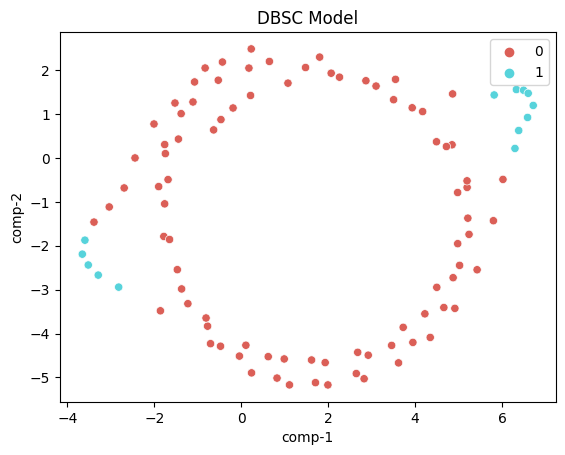

In [ ]:
tsne(X,anomalies_DBSC['Anomaly'],2,'DBSC Model')

_________________________________________________________________________
The Test accuracy : 0.9693877551020408
_________________________________________________________________________
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98        86
         1.0       0.85      0.92      0.88        12

    accuracy                           0.97        98
   macro avg       0.92      0.95      0.93        98
weighted avg       0.97      0.97      0.97        98

_________________________________________________________________________
The macro precision on test data is  : 0.9171945701357467
The weighted precision on test data is  : 0.9708375657955491
_________________________________________________________________________
The macro recall on test data is  : 0.946705426356589
The weighted recall on test data is  : 0.9693877551020408
_________________________________________________________________________
The macro f_score on test data is

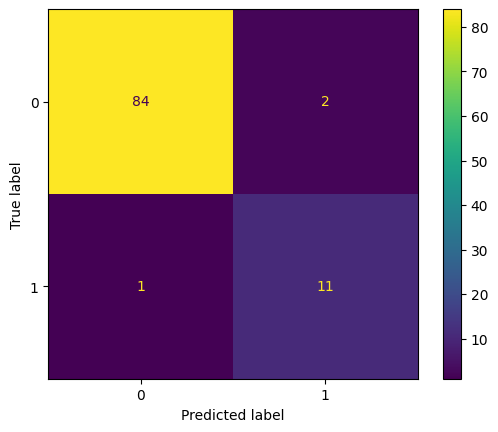

In [ ]:
eval(df2['labels'],anomalies_DBSC['Anomaly'])

In [ ]:
results = anomalies_DBSC.iloc[:,:-1]
anomalies = anomalies_DBSC[anomalies_DBSC['Anomaly'] == 1].iloc[:,:-1]

In [ ]:
fig1 = px.line(df2, x="Unnamed: 0", y=['Follower_measure_x_follower',	'Follower_measure_y_follower',	'Leader_measure_x_leader',	'Leader_measure_y_leader'], title='Data', template = 'plotly_dark')

fig2 = px.scatter(anomalies, x="Unnamed: 0", y=['Follower_measure_x_follower',	'Follower_measure_y_follower',	'Leader_measure_x_leader',	'Leader_measure_y_leader'],template = 'plotly_dark')

fig2.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

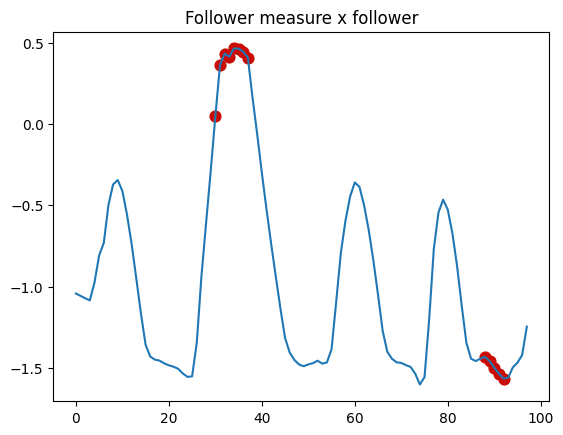

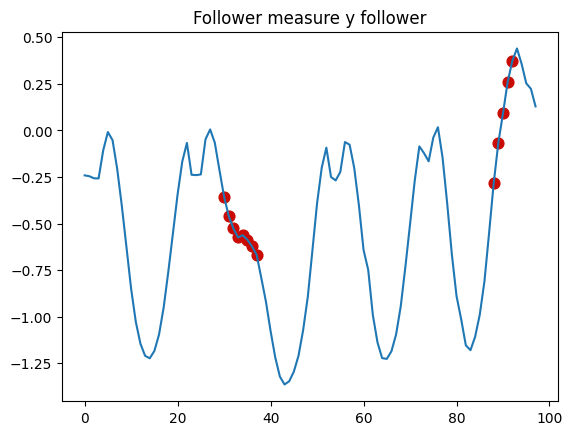

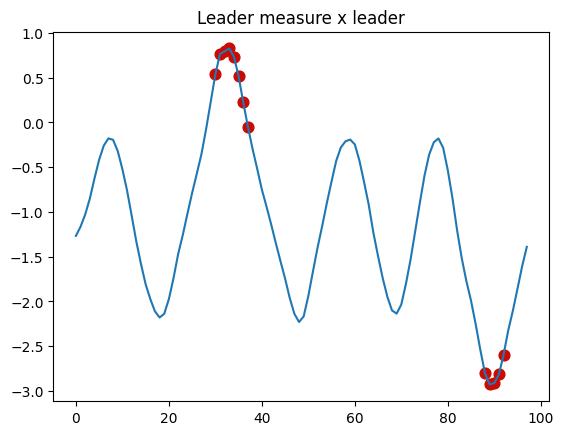

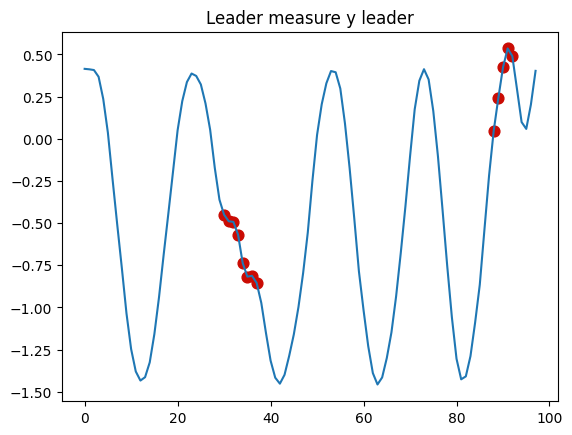

In [ ]:
for column in results.columns[1:]:
    plt.plot(anomalies_DBSC[column])
    plt.scatter(anomalies.index,anomalies[column],c='r',marker='o',s=60,alpha=1)
    plt.title(" ".join(column.split('_')))
    plt.show()